# Analyze Scrambled Queries

TBD

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import json
from tqdm import tqdm

DATA_DIR = '/mnt/ceph/storage/data-in-progress/data-research/web-search/private-web-search-with-keyqueries/'
QUERY_DIR = DATA_DIR + 'scrambling-on-anserini/'

APPROACHES = ['nounphrase', 'arampatzis', 'tf-idf', 'hbc', 'arampatzisHbc', 'HbcTfIdf']
RETRIEVAL_MODELS = ['bm25', 'qld']

TOPICS = [2, 8, 11, 17, 18, 26, 30, 33, 38, 40, 46, 47, 50, 57, 59, 61, 62, 66, 67, 78, 82, 88, 89, 95, 98, 104, 105, 109, 111, 117, 119, 121, 123, 128, 131, 136, 140, 142, 147, 152, 156, 162, 168, 173, 175, 177, 182, 196, 199, 207, 213, 222, 236, 253, 254, 262, 266, 273, 286, 287, 209, 214]

# Check for Missing Run Files

In [2]:
for approach in APPROACHES:
    for retrieval_model in RETRIEVAL_MODELS:
        for topic in TOPICS:
            file_name = QUERY_DIR + approach + '-' + retrieval_model + '/' + str(topic) + '.jsonl'
            try:
                with open(file_name) as f:
                    for l in f:
                        break
            except:
                print('Missing run file at: ' + file_name)

# General Purpose corpus statistics

In [3]:
df_query_stats = pd.read_json(QUERY_DIR + '/per-query-statistics.jsonl', lines=True)
df_query_stats

,topic,vocabularySize,meanTokensInQuery,retrievalModel,scramblingApproach
0,2,23,11.511241,bm25,nounphrase
1,8,23,13.012708,bm25,nounphrase
2,11,24,13.012708,bm25,nounphrase
3,17,23,13.012708,bm25,nounphrase
4,18,23,12.011730,bm25,nounphrase
...,...,...,...,...,...
119,273,21,11.010753,qld,nounphrase
120,286,13,13.012708,qld,nounphrase
121,287,30,16.015640,qld,nounphrase
122,209,21,11.010753,qld,nounphrase


In [9]:
df_query_stats_for_table = df_query_stats.groupby(['scramblingApproach', 'retrievalModel']).mean()[['vocabularySize', 'meanTokensInQuery']]
df_query_stats_for_table

vocabularySize  meanTokensInQuery
scramblingApproach retrievalModel                                   
nounphrase         bm25                 21.564516          12.649450
                   qld                  20.967742          12.505817

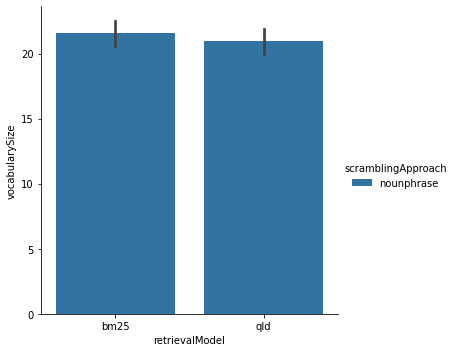

In [7]:
sns.catplot(data = df_query_stats, x='retrievalModel', y='vocabularySize', hue='scramblingApproach', kind='bar')

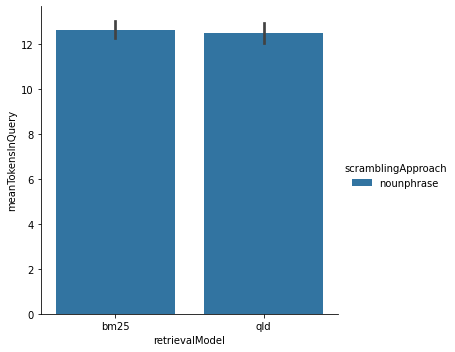

In [8]:
sns.catplot(data = df_query_stats, x='retrievalModel', y='meanTokensInQuery', hue='scramblingApproach', kind='bar')

In [3]:
def load_json(l):
    try:
        return json.loads(l)
    except:
        print(l)
        return None

def load_scrambled_queries(topic, approach, retrieval_model):
    #print('Process: ' + QUERY_DIR + approach + '-' + retrieval_model + '/' + str(topic) + '.jsonl')
    with open(QUERY_DIR + approach + '-' + retrieval_model + '/' + str(topic) + '.jsonl') as f:
        for l in tqdm(f):
            l = load_json(l)
            if not l:
                continue
            
            hits_at_10 = 0
            hits_at_100 = 0
            for _, pos in l['targetDocs'].items():
                if pos and pos <= 10:
                    hits_at_10 += 1
                if pos and pos <= 100:
                    hits_at_100 += 1
                    
            ret = {
                'topic': topic,
                'retrievalModel': retrieval_model,
                'approach': approach,
            }
            
            yield dict(ret, **{'value': hits_at_10/len(l['targetDocs']), 'measure': 'recall@10'})
            yield dict(ret, **{'value': hits_at_100/len(l['targetDocs']), 'measure': 'recall@100'})

In [4]:
df = []

for approach in APPROACHES:
    for retrievalModel in RETRIEVAL_MODELS:
        for topic in TOPICS:
            df += [i for i in load_scrambled_queries(topic, approach, retrievalModel)]
df = pd.DataFrame(df)

1023it [00:00, 62389.46it/s]
1023it [00:00, 66775.18it/s]
1023it [00:00, 58817.19it/s]
1023it [00:00, 68992.36it/s]
1023it [00:00, 70112.96it/s]
1023it [00:00, 69341.34it/s]
1023it [00:00, 20549.78it/s]
1023it [00:00, 65560.03it/s]
1023it [00:00, 53495.57it/s]
1023it [00:00, 76440.76it/s]
1023it [00:00, 63800.47it/s]
1023it [00:00, 64869.20it/s]
1023it [00:00, 32542.59it/s]
1023it [00:00, 67965.10it/s]
1023it [00:00, 41372.00it/s]
1023it [00:00, 95088.49it/s]
1023it [00:00, 95289.10it/s]
1023it [00:00, 93676.82it/s]
1023it [00:00, 30209.05it/s]
1023it [00:00, 90576.14it/s]
1023it [00:00, 30249.73it/s]
1023it [00:00, 24881.26it/s]
1023it [00:00, 87463.27it/s]
1023it [00:00, 88517.00it/s]
1023it [00:00, 83102.98it/s]
1023it [00:00, 23783.85it/s]
1023it [00:00, 92805.58it/s]
1023it [00:00, 92507.45it/s]
1023it [00:00, 86587.82it/s]
1023it [00:00, 57357.91it/s]
1023it [00:00, 87152.38it/s]
1023it [00:00, 97285.41it/s]
1023it [00:00, 92775.48it/s]
1023it [00:00, 76770.37it/s]
1023it [00:00,

1234it [00:00, 25386.36it/s]
696it [00:00, 75883.43it/s]
1131it [00:00, 45326.71it/s]
1154it [00:00, 95654.77it/s]
1219it [00:00, 95252.28it/s]
531it [00:00, 86485.53it/s]
1158it [00:00, 94658.14it/s]
1121it [00:00, 32398.16it/s]
1227it [00:00, 93722.77it/s]
1266it [00:00, 55881.09it/s]
1197it [00:00, 27011.55it/s]
1006it [00:00, 79528.61it/s]
1093it [00:00, 88155.96it/s]
1061it [00:00, 49927.71it/s]
982it [00:00, 86823.22it/s]
1266it [00:00, 26010.49it/s]
1228it [00:00, 45210.10it/s]
1233it [00:00, 89111.34it/s]
1112it [00:00, 91439.72it/s]
501it [00:00, 10431.62it/s]
1135it [00:00, 44468.96it/s]
1159it [00:00, 83061.91it/s]
1218it [00:00, 87601.60it/s]
1247it [00:00, 91754.77it/s]
1050it [00:00, 83796.70it/s]
1246it [00:00, 26675.22it/s]
1126it [00:00, 95725.04it/s]
1012it [00:00, 46552.78it/s]
1183it [00:00, 39997.27it/s]
1106it [00:00, 83998.48it/s]
988it [00:00, 86491.32it/s]
1059it [00:00, 84090.95it/s]
1010it [00:00, 79778.66it/s]
1119it [00:00, 86645.74it/s]
1002it [00:00, 3384

123729it [00:01, 99018.67it/s] 
150293it [00:01, 98068.59it/s] 
290414it [00:02, 97895.77it/s] 
363872it [00:03, 100371.20it/s]
82790it [00:00, 100439.78it/s]
73649it [00:00, 99124.65it/s] 
283020it [00:02, 101417.47it/s]
228388it [00:02, 99875.44it/s] 
199139it [00:01, 103229.32it/s]
167376it [00:01, 101463.04it/s]
53863it [00:00, 94513.07it/s]
434932it [00:04, 101095.70it/s]
773113it [00:07, 100625.57it/s]
286780it [00:02, 99992.74it/s] 
218398it [00:02, 103699.80it/s]
81324it [00:00, 102118.11it/s]
101361it [00:01, 100377.73it/s]
163617it [00:01, 101405.10it/s]
137538it [00:01, 96528.46it/s] 
3524it [00:00, 59869.60it/s]
1010124it [00:14, 70579.38it/s]
130238it [00:01, 94618.75it/s] 
669873it [00:06, 98912.37it/s] 
226510it [00:02, 101273.45it/s]
631990it [00:06, 95951.13it/s] 
332019it [00:03, 100058.77it/s]
93208it [00:01, 92239.95it/s]
345173it [00:03, 101698.63it/s]
229230it [00:02, 100820.85it/s]
143738it [00:01, 99594.48it/s] 
126083it [00:01, 98963.03it/s] 
47294it [00:00, 95

In [5]:
len(df)

131077542

In [6]:
df.to_json('/mnt/ceph/storage/data-in-progress/data-research/web-search/private-web-search-with-keyqueries/scrambling-on-anserini/scrambling-recall-evaluation.jsonl', orient='records')

In [8]:
def build_print_df(df):
    ret = []
    for measure in df['measure'].unique():
        for model in df['retrievalModel'].unique():
            for approach in df['approach'].unique():
                df_measure_model_approach = df[(df['measure'] == measure) & (df['retrievalModel'] == model) & (df['approach'] == approach)]
                
                for topic in df_measure_model_approach['topic'].unique():
                    tmp_df =  df_measure_model_approach[(df_measure_model_approach['topic'] == topic)].sort_values('value', ascending=False).reset_index()
                    for topic, v in tqdm(tmp_df.iterrows()):
                        enter = topic < 100 or (topic < 1000 and (topic % 10) == 0) or (topic < 10000 and (topic % 100) == 0) or ((topic % 1000) == 0)
                        if enter:
                            ret += [{
                                'topic': topic,
                                'measure': measure,
                                'model': model,
                                'approach': approach,
                                'value': v['value']
                            }]
                        
    return pd.DataFrame(ret)

df_plot = build_print_df(df)

1023it [00:00, 10014.36it/s]
1023it [00:00, 11482.26it/s]
1023it [00:00, 11614.61it/s]
1023it [00:00, 11696.87it/s]
1023it [00:00, 11713.63it/s]
1023it [00:00, 10817.56it/s]
1023it [00:00, 10886.75it/s]
1023it [00:00, 10980.56it/s]
1023it [00:00, 11496.39it/s]
1023it [00:00, 10698.53it/s]
1023it [00:00, 10811.45it/s]
1023it [00:00, 10957.37it/s]
1023it [00:00, 11297.33it/s]
1023it [00:00, 11381.27it/s]
1023it [00:00, 11086.18it/s]
1023it [00:00, 10713.17it/s]
1023it [00:00, 10608.07it/s]
1023it [00:00, 10988.09it/s]
1023it [00:00, 11347.98it/s]
1023it [00:00, 11702.48it/s]
1023it [00:00, 11285.21it/s]
1023it [00:00, 10754.52it/s]
1023it [00:00, 10889.37it/s]
1023it [00:00, 11407.35it/s]
1023it [00:00, 11584.60it/s]
1023it [00:00, 11300.28it/s]
1023it [00:00, 10623.35it/s]
1023it [00:00, 10683.56it/s]
1023it [00:00, 11302.30it/s]
1023it [00:00, 11541.07it/s]
1023it [00:00, 11327.64it/s]
1023it [00:00, 10845.64it/s]
1023it [00:00, 11230.48it/s]
1023it [00:00, 11653.50it/s]
1023it [00:00,

651032it [00:56, 11549.40it/s]
243400it [00:20, 11625.52it/s]
86195it [00:07, 11210.97it/s]
90342it [00:07, 11343.48it/s]
404591it [00:35, 11372.46it/s]
270570it [00:23, 11446.32it/s]
284321it [00:24, 11632.37it/s]
305429it [00:25, 11767.39it/s]
124145it [00:10, 11637.33it/s]
204825it [00:17, 11633.54it/s]
92296it [00:07, 11882.23it/s]
288243it [00:24, 11716.73it/s]
630954it [00:53, 11763.61it/s]
45961it [00:03, 11753.79it/s]
233988it [00:19, 11702.56it/s]
90416it [00:08, 11140.11it/s]
224557it [00:19, 11274.65it/s]
274026it [00:23, 11439.49it/s]
301918it [00:26, 11523.15it/s]
251726it [00:21, 11591.99it/s]
172370it [00:14, 11640.84it/s]
278416it [00:23, 11648.11it/s]
169823it [00:14, 11528.65it/s]
330274it [00:28, 11407.60it/s]
129371it [00:11, 11469.50it/s]
123729it [00:10, 11366.96it/s]
150293it [00:13, 11446.50it/s]
290414it [00:25, 11472.49it/s]
363872it [00:31, 11383.37it/s]
82790it [00:07, 11435.95it/s]
73649it [00:06, 11480.27it/s]
920it [00:00, 10891.99it/s]
836it [00:00, 1131

385it [00:00, 10898.34it/s]
360it [00:00, 11265.93it/s]
77it [00:00, 9509.49it/s]
694it [00:00, 11413.79it/s]
385it [00:00, 11300.26it/s]
385it [00:00, 11233.13it/s]
651it [00:00, 11457.97it/s]
385it [00:00, 11010.77it/s]
235it [00:00, 10956.42it/s]
385it [00:00, 11350.14it/s]
629it [00:00, 11418.43it/s]
350it [00:00, 11247.45it/s]
650it [00:00, 11445.08it/s]
385it [00:00, 11350.94it/s]
385it [00:00, 11335.72it/s]
385it [00:00, 11143.75it/s]
385it [00:00, 11370.52it/s]
640it [00:00, 11419.29it/s]
377it [00:00, 11410.81it/s]
658it [00:00, 11106.04it/s]
164it [00:00, 10575.23it/s]
244it [00:00, 10990.70it/s]
385it [00:00, 11275.56it/s]
378it [00:00, 11304.03it/s]
385it [00:00, 11331.26it/s]
378it [00:00, 11343.09it/s]
21it [00:00, 3120.65it/s]
385it [00:00, 11283.68it/s]
368it [00:00, 11173.64it/s]
84it [00:00, 9975.13it/s]
385it [00:00, 11335.08it/s]
385it [00:00, 11162.54it/s]
261it [00:00, 11136.34it/s]
154it [00:00, 9901.63it/s]
626it [00:00, 11285.58it/s]
385it [00:00, 11289.67it/s]

115617it [00:10, 11246.92it/s]
120437it [00:10, 11264.68it/s]
477018it [00:42, 11304.40it/s]
309769it [00:26, 11720.41it/s]
334872it [00:29, 11443.63it/s]
352187it [00:30, 11384.81it/s]
162530it [00:14, 11359.64it/s]
239251it [00:21, 11175.57it/s]
109912it [00:09, 11491.98it/s]
354211it [00:30, 11444.96it/s]
739352it [01:03, 11617.83it/s]
60667it [00:05, 11412.70it/s]
271230it [00:24, 11232.19it/s]
111942it [00:09, 11276.82it/s]
265262it [00:23, 11347.77it/s]
316256it [00:27, 11379.30it/s]
370139it [00:32, 11460.25it/s]
301507it [00:26, 11390.71it/s]
205742it [00:18, 11389.69it/s]
323440it [00:28, 11505.08it/s]
205633it [00:18, 11296.88it/s]
394775it [00:34, 11288.55it/s]
162740it [00:14, 11295.69it/s]
145491it [00:12, 11252.74it/s]
180463it [00:15, 11371.80it/s]
345744it [00:30, 11394.69it/s]
433519it [00:37, 11498.95it/s]
94296it [00:07, 11876.23it/s]
90341it [00:07, 11679.90it/s]
1161it [00:00, 10759.78it/s]
1113it [00:00, 10831.98it/s]
1055it [00:00, 11372.78it/s]
913it [00:00, 115

1023it [00:00, 11223.11it/s]
1023it [00:00, 10853.79it/s]
1023it [00:00, 10563.20it/s]
1023it [00:00, 10508.49it/s]
1023it [00:00, 10681.43it/s]
1023it [00:00, 10459.05it/s]
1023it [00:00, 10407.02it/s]
1023it [00:00, 10306.06it/s]
1023it [00:00, 10888.32it/s]
1023it [00:00, 11149.79it/s]
1023it [00:00, 10855.10it/s]
1023it [00:00, 11159.62it/s]
1023it [00:00, 11258.68it/s]
1023it [00:00, 11290.56it/s]
1023it [00:00, 10766.07it/s]
1023it [00:00, 10944.51it/s]
1023it [00:00, 11129.34it/s]
1023it [00:00, 11238.19it/s]
1023it [00:00, 11244.46it/s]
1023it [00:00, 11022.90it/s]
1023it [00:00, 11120.43it/s]
1023it [00:00, 11229.39it/s]
1007it [00:00, 11190.50it/s]
1023it [00:00, 11231.92it/s]
1023it [00:00, 10959.46it/s]
1023it [00:00, 10724.12it/s]
1023it [00:00, 11069.48it/s]
1023it [00:00, 11085.15it/s]
1023it [00:00, 11144.69it/s]
1023it [00:00, 10949.73it/s]
1023it [00:00, 10927.51it/s]
1023it [00:00, 8434.55it/s]
1023it [00:00, 11697.57it/s]
1023it [00:00, 8139.51it/s]
1023it [00:00, 8

822470it [01:12, 11296.31it/s]
30496it [00:02, 11452.79it/s]
332012it [00:28, 11761.41it/s]
450879it [00:39, 11483.96it/s]
124860it [00:10, 11483.04it/s]
204144it [00:17, 11372.56it/s]
92296it [00:07, 11758.86it/s]
288243it [00:24, 11717.18it/s]
630914it [00:54, 11586.01it/s]
24741it [00:02, 11573.64it/s]
108837it [00:09, 11749.90it/s]
92741it [00:07, 11611.43it/s]
224614it [00:19, 11683.42it/s]
358657it [00:31, 11483.03it/s]
306494it [00:27, 11273.73it/s]
267690it [00:23, 11374.96it/s]
129214it [00:11, 11347.04it/s]
314704it [00:28, 11084.69it/s]
170055it [00:15, 11077.62it/s]
330169it [00:28, 11450.96it/s]
156890it [00:13, 11435.83it/s]
133098it [00:11, 11441.00it/s]
147576it [00:13, 11186.01it/s]
358302it [00:31, 11515.24it/s]
363627it [00:30, 11986.11it/s]
881796it [01:16, 11558.92it/s]
78020it [00:06, 11245.92it/s]
938it [00:00, 10088.87it/s]
831it [00:00, 10595.03it/s]
380it [00:00, 10196.50it/s]
639it [00:00, 10906.44it/s]
927it [00:00, 10897.04it/s]
956it [00:00, 10163.11it/s]


In [9]:
df_plot.to_json('/mnt/ceph/storage/data-in-progress/data-research/web-search/private-web-search-with-keyqueries/scrambling-on-anserini/df-plot-for-scrambling-recall-evaluation-new.jsonl', orient='records')

In [10]:
df_plot[df_plot['topic'] <= 25]

,topic,measure,model,approach,value
0,0,recall@10,bm25,nounphrase,0.3
1,1,recall@10,bm25,nounphrase,0.3
2,2,recall@10,bm25,nounphrase,0.3
3,3,recall@10,bm25,nounphrase,0.3
4,4,recall@10,bm25,nounphrase,0.3
...,...,...,...,...,...
430823,21,recall@100,qld,HbcTfIdf,0.9
430824,22,recall@100,qld,HbcTfIdf,0.9
430825,23,recall@100,qld,HbcTfIdf,0.9
430826,24,recall@100,qld,HbcTfIdf,0.9


In [141]:
df_plot[df_plot['topic'] <= 25]

,topic,measure,model,approach,value
0,0,recall@10,bm25,nounphrase,0.3
1,1,recall@10,bm25,nounphrase,0.3
2,2,recall@10,bm25,nounphrase,0.3
3,3,recall@10,bm25,nounphrase,0.3
4,4,recall@10,bm25,nounphrase,0.3
...,...,...,...,...,...
11161,940,recall@100,qld,tf-idf,0.0
11162,950,recall@100,qld,tf-idf,0.0
11163,960,recall@100,qld,tf-idf,0.0
11164,970,recall@100,qld,tf-idf,0.0


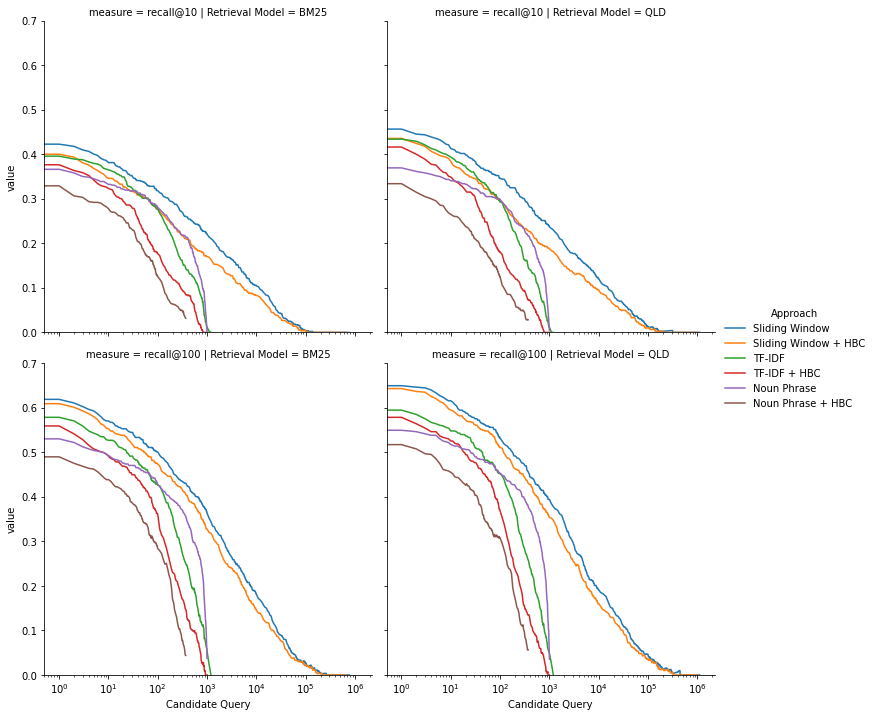

In [30]:
def beautify_approaches(approach):
    if approach == 'nounphrase':
        return 'Noun Phrase'
    elif approach == 'hbc':
        return 'Noun Phrase + HBC'
    elif approach == 'tf-idf':
        return 'TF-IDF'
    elif approach == 'HbcTfIdf':
        return 'TF-IDF + HBC'
    elif approach == 'arampatzis':
        return 'Sliding Window'
    elif approach == 'arampatzisHbc':
        return 'Sliding Window + HBC'
    return approach

def beatify_model(model):
    if model == 'bm25':
        return 'BM25'
    elif model == 'qld':
        return 'QLD'

df_plot['Retrieval Model'] = df_plot['model'].apply(beatify_model)
df_plot['Approach'] = df_plot['approach'].apply(beautify_approaches)
df_plot['Candidate Query'] = df_plot['topic']

plot = sns.relplot(
    data=df_plot[((df_plot['approach'] == 'hbc') & (df_plot['topic'] < 380)) | (df_plot['approach'] != 'hbc')],
    x='Candidate Query',
    y='value',
    kind='line',
    hue='Approach',
    row='measure',
    col='Retrieval Model',
    facet_kws={'ylim': (0,0.7)},
    ci=None,
    hue_order=['Sliding Window', 'Sliding Window + HBC', 'TF-IDF', 'TF-IDF + HBC', 'Noun Phrase', 'Noun Phrase + HBC']
)
plot.set(xscale="log")
plot

plot.savefig('recall-of-scrabled-queries-per-topic.pdf')

# Create Table

In [52]:
df_query_stats = pd.read_json(QUERY_DIR + 'per-query-statistics.jsonl', lines=True)
df_query_stats

def beautify_approaches(approach):
    if approach == 'nounphrase' or approach == 'hbc':
        return 'Noun Phrase'
    elif approach == 'tf-idf' or approach == 'HbcTfIdf':
        return 'TF-IDF'
    elif 'arampatzis' in approach:
        return 'Sliding Window'
    

df_query_stats.scramblingApproach.unique()
df_query_stats['Approach'] = df_query_stats['scramblingApproach'].apply(beautify_approaches)
df_query_stats['HBC'] = df_query_stats['scramblingApproach'].apply(lambda i: 'hbc' in i.lower())
df_query_stats = df_query_stats[(df_query_stats['scramblingApproach'] != 'hbc') | (df_query_stats['queries'] <= 385)]
df_query_stats = df_query_stats.groupby(['Approach', 'HBC', 'retrievalModel']).mean()[['vocabularySize', 'meanTokensInQuery', 'queries']].reset_index()

df_query_stats

,Approach,HBC,retrievalModel,vocabularySize,meanTokensInQuery,queries
0,Noun Phrase,False,bm25,21.564516,12.649450,1023.000000
1,Noun Phrase,False,qld,20.967742,12.505817,1022.741935
2,Noun Phrase,True,bm25,22.038462,8.210525,323.903846
3,Noun Phrase,True,qld,21.627451,7.982773,316.137255
4,Sliding Window,False,bm25,1117.725806,2.729525,253560.064516
5,Sliding Window,False,qld,1302.064516,2.730081,318088.096774
6,Sliding Window,True,bm25,1117.725806,2.838766,212409.822581
7,Sliding Window,True,qld,1302.064516,2.838519,266533.677419
8,TF-IDF,False,bm25,41.500000,3.593011,1075.822581
9,TF-IDF,False,qld,40.483871,3.596232,1044.032258


In [57]:
def 

def table_overview_scrambled_queries():
    return """\\begin{table}[t]%
\\centering%
\\scriptsize%
\\renewcommand{\\tabcolsep}{3.5pt}%
\\renewcommand{\\arraystretch}{0.9}
\\caption{Overview of candidate queries generated by the sliding window~(SW)~\\cite{arampatzis:2015}, nounphrase (NP), filtered nounphrases (HBC), and XYZ (TF-IDF) approaches. We show in (a) XYZ, and in (b) XYZ.}%
\\label{table-overview-scrambled-queries}%
\\vspace{-2ex}%
\\begin{tabular}[t]{@{}lcccc@{}}
\\multicolumn{5}{@{}l}{(a)} \\\\[1ex]
\\toprule
& \\multicolumn{4}{@{}c@{}}{\\bfseries Query Scrambling Approach} \\\\
\\cmidrule(l@{\\tabcolsep}){2-5}
                                       & SW  & NP & TF-IDF  &     \\\\
\\midrule
Scr. Queries \\ldots                    & --- & --- & --- & ---    \\\\
\\phantom{0}Rec.@10\\phantom{0} > 0.5    & --- & --- & --- & ---    \\\\
\\phantom{0}Rec.@100 > 0.5              & --- & --- & --- & ---    \\\\
\\phantom{0}Rec.@100 > 0.1              & --- & --- & --- & ---    \\\\
Query Length                           & --- & --- & --- & ---    \\\\
Vocab. Size                            & --- & --- & --- & ---    \\\\
\\midrule
Scr. Queries \\ldots                    & --- & --- & --- & ---    \\\\
\\phantom{0}Rec.@10\\phantom{0} > 0.5    & --- & --- & --- & ---    \\\\
\\phantom{0}Rec.@100 > 0.5              & --- & --- & --- & ---    \\\\
\\phantom{0}Rec.@100 > 0.1              & --- & --- & --- & ---    \\\\
Query Length                           & --- & --- & --- & ---    \\\\
Vocab. Size                            & --- & --- & --- & ---    \\\\
\\bottomrule
\\end{tabular}%
\\hfill
\\begin{tabular}[t]{@{}l@{}}
(b) \\\\[1ex]
\\includegraphics[width=6.0cm, height=4.3cm]{recall-of-scrambled-queries-per-topic}\\\\[-1ex]
\\end{tabular}

(c)
\\includegraphics[width=4cm]{hbc-saved-queries}
\\end{table} 
"""

print(table_overview_scrambled_queries())

\begin{table}[t]%
\centering%
\scriptsize%
\renewcommand{\tabcolsep}{3.5pt}%
\renewcommand{\arraystretch}{0.9}
\caption{Overview of candidate queries generated by the sliding window~(SW)~\cite{arampatzis:2015}, nounphrase (NP), filtered nounphrases (HBC), and XYZ (TF-IDF) approaches. We show in (a) XYZ, and in (b) XYZ.}%
\label{table-overview-scrambled-queries}%
\vspace{-2ex}%
\begin{tabular}[t]{@{}lcccc@{}}
\multicolumn{5}{@{}l}{(a)} \\[1ex]
\toprule
& \multicolumn{4}{@{}c@{}}{\bfseries Query Scrambling Approach} \\
\cmidrule(l@{\tabcolsep}){2-5}
                                       & SW  & NP & HBC  & TF-IDF \\
\midrule
Scr. Queries \ldots                    & --- & --- & --- & ---    \\
\phantom{0}Rec.@10\phantom{0} > 0.5    & --- & --- & --- & ---    \\
\phantom{0}Rec.@100 > 0.5              & --- & --- & --- & ---    \\
\phantom{0}Rec.@100 > 0.1              & --- & --- & --- & ---    \\
Query Length                           & --- & --- & --- & ---    \\
Vocab. Size            

In [81]:
def approach(a, r, h):
    ret = df_query_stats[(df_query_stats['Approach'] == a) & (df_query_stats['retrievalModel'] == r) & (df_query_stats['HBC'] == h)]
    if len(ret) != 1:
        raise ValueError('aaaa')
        
    return ret.iloc[0]

def f(i):
    return '{:.1f}'.format(i)

def candidate_row(hbc, retrievalModel, field):
    values = ' & '.join([f(approach(i, retrievalModel, hbc)[field]) for i in ['Sliding Window', 'TF-IDF', 'Noun Phrase']])

    return ('\\phantom{00} with HBC        & ' if hbc else 'Candidates                    & ') + values + '\\\\\n'
    

In [84]:
print(candidate_row(False, 'bm25', 'queries'))
print(candidate_row(True, 'bm25', 'queries'))

print(candidate_row(False, 'bm25', 'meanTokensInQuery'))
print(candidate_row(True, 'bm25', 'meanTokensInQuery'))
print(candidate_row(False, 'bm25', 'vocabularySize'))


Candidates                    & 253560.1 & 1075.8 & 1023.0\\

\phantom{00} with HBC        & 212409.8 & 801.8 & 323.9\\

Candidates                    & 2.7 & 3.6 & 12.6\\

\phantom{00} with HBC        & 2.8 & 3.1 & 8.2\\

Candidates                    & 1117.7 & 41.5 & 21.6\\



In [85]:
print(candidate_row(False, 'qld', 'queries'))
print(candidate_row(True, 'qld', 'queries'))

print(candidate_row(False, 'qld', 'meanTokensInQuery'))
print(candidate_row(True, 'qld', 'meanTokensInQuery'))
print(candidate_row(False, 'qld', 'vocabularySize'))

Candidates                    & 318088.1 & 1044.0 & 1022.7\\

\phantom{00} with HBC        & 266533.7 & 766.8 & 316.1\\

Candidates                    & 2.7 & 3.6 & 12.5\\

\phantom{00} with HBC        & 2.8 & 3.1 & 8.0\\

Candidates                    & 1302.1 & 40.5 & 21.0\\



In [100]:
df_tmp = df
df_tmp['>= 0.5'] = df_tmp.value.apply(lambda i: i >= 0.5)

df_tmp = df_tmp.groupby(['topic','retrievalModel', 'approach', 'measure']).sum()['>= 0.5'].reset_index()
df_tmp = df_tmp[['retrievalModel', 'approach', 'measure', '>= 0.5']].groupby(['retrievalModel', 'approach', 'measure']).mean()['>= 0.5'].reset_index()
df_tmp

,retrievalModel,approach,measure,>= 0.5
0,bm25,HbcTfIdf,recall@10,8.145161
1,bm25,HbcTfIdf,recall@100,64.645161
2,bm25,arampatzis,recall@10,507.677419
3,bm25,arampatzis,recall@100,1851.580645
4,bm25,arampatzisHbc,recall@10,35.370968
5,bm25,arampatzisHbc,recall@100,979.419355
6,bm25,hbc,recall@10,3.612903
7,bm25,hbc,recall@100,41.822581
8,bm25,nounphrase,recall@10,67.451613
9,bm25,nounphrase,recall@100,246.435484


In [109]:
def approach(a, r, m):
    ret = df_tmp[(df_tmp['approach'] == a) & (df_tmp['retrievalModel'] == r) & (df_tmp['measure'] == m)]
    if len(ret) != 1:
        raise ValueError('aaaa')
        
    return ret.iloc[0]

def candidate_row(measure, retrievalModel, hbc):
    appr = ['arampatzisHbc', 'HbcTfIdf', 'hbc'] if hbc else ['arampatzis', 'tf-idf', 'nounphrase']
    
    values = ' & '.join([f(approach(i, retrievalModel, measure)['>= 0.5']) for i in appr])

    return ('\\phantom{00} with HBC        & ' if hbc else 'Recall....                    & ') + values + '\\\\\n'
    

In [103]:
df_tmp.approach.unique()

array(['HbcTfIdf', 'arampatzis', 'arampatzisHbc', 'hbc', 'nounphrase',
       'tf-idf'], dtype=object)

In [111]:
print(candidate_row('recall@10', 'bm25', False))
print(candidate_row('recall@10', 'bm25', True))

print(candidate_row('recall@100', 'bm25', False))
print(candidate_row('recall@100', 'bm25', True))

Recall....                    & 507.7 & 51.8 & 67.5\\

\phantom{00} with HBC        & 35.4 & 8.1 & 3.6\\

Recall....                    & 1851.6 & 144.1 & 246.4\\

\phantom{00} with HBC        & 979.4 & 64.6 & 41.8\\



In [112]:
print(candidate_row('recall@10', 'qld', False))
print(candidate_row('recall@10', 'qld', True))

print(candidate_row('recall@100', 'qld', False))
print(candidate_row('recall@100', 'qld', True))

Recall....                    & 763.5 & 57.0 & 77.5\\

\phantom{00} with HBC        & 87.4 & 10.6 & 3.0\\

Recall....                    & 2719.8 & 160.4 & 260.8\\

\phantom{00} with HBC        & 1483.5 & 74.1 & 43.7\\

